In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_clinical_merged_data = pd.merge(clinical_trial_data, mouse_drug_data, how="left", on=["Mouse ID", "Mouse ID"])
mouse_clinical_merged_data.head()
# Display the data table for preview



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = mouse_clinical_merged_data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
# Convert to DataFrame
mean_tumor_volume = pd.DataFrame(mean_tumor_volume)
mean_tumor_volume = mean_tumor_volume.reset_index()
# Preview DataFrame
mean_tumor_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sems = mouse_clinical_merged_data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
sems = pd.DataFrame(sems)
sems = sems.reset_index()

# Preview DataFrame
sems.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_fmt = mean_tumor_volume.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
                                                
# Preview that Reformatting worked
mean_tumor_volume_fmt

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


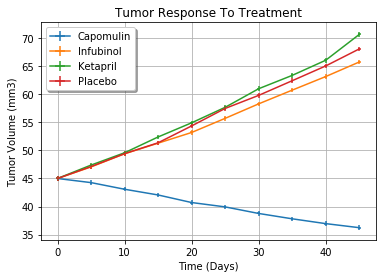

In [5]:
# Generate the Plot (with Error Bars)
Timepoint = (0,5,10,15,20,25,30,35,40,45)
Capomulin=mean_tumor_volume_fmt.Capomulin
Infubinol=mean_tumor_volume_fmt.Infubinol
Ketapril=mean_tumor_volume_fmt.Ketapril
Placebo=mean_tumor_volume_fmt.Placebo

fig = plt.figure()
plt.errorbar(Timepoint, Capomulin, xerr=0.2, yerr=0.4)
plt.errorbar(Timepoint, Infubinol, xerr=0.2, yerr=0.4)
plt.errorbar(Timepoint, Ketapril, xerr=0.2, yerr=0.4)
plt.errorbar(Timepoint, Placebo, xerr=0.2, yerr=0.4)
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response To Treatment')
plt.legend(loc='best', shadow=True)
plt.grid()

# Save the Figure
fig.savefig('Tumor Response to Treatment.png')


## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic_sites = mouse_clinical_merged_data.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
mean_metastatic_sites = pd.DataFrame(mean_metastatic_sites)
mean_metastatic_sites = mean_metastatic_sites.reset_index()

# Preview DataFrame
mean_metastatic_sites.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sems_met_sites = mouse_clinical_merged_data.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
sems_met_sites = pd.DataFrame(sems_met_sites)
sems_met_sites = sems_met_sites.reset_index()
# Preview DataFrame
sems_met_sites.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
# Minor Data Munging to Re-Format the Data Frames
mean_metastatic_sites_fmt = mean_metastatic_sites.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
# Preview that Reformatting worked
mean_metastatic_sites_fmt

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


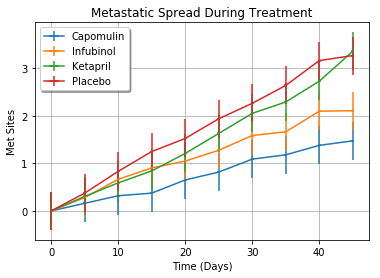

In [9]:
# Generate the Plot (with Error Bars)
Timepoint = (0,5,10,15,20,25,30,35,40,45)
Capomulin=mean_metastatic_sites_fmt.Capomulin
Infubinol=mean_metastatic_sites_fmt.Infubinol
Ketapril=mean_metastatic_sites_fmt.Ketapril
Placebo=mean_metastatic_sites_fmt.Placebo

metastat_fig = plt.figure()
plt.errorbar(Timepoint, Capomulin, xerr=0.2, yerr=0.4)
plt.errorbar(Timepoint, Infubinol, xerr=0.2, yerr=0.4)
plt.errorbar(Timepoint, Ketapril, xerr=0.2, yerr=0.4)
plt.errorbar(Timepoint, Placebo, xerr=0.2, yerr=0.4)
plt.xlabel('Time (Days)')
plt.ylabel('Met Sites')
plt.title('Metastatic Spread During Treatment')
plt.legend(loc='best', shadow=True)
plt.grid()
# Save the Figure
metastat_fig.savefig('Metastatic Spread During Treatment.png')

# Show the Figure
plt.show()

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_of_mice = mouse_clinical_merged_data.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]

# Convert to DataFrame
count_of_mice = pd.DataFrame(count_of_mice)
count_of_mice = count_of_mice.reset_index()

# Preview DataFrame
count_of_mice.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
count_of_mice_fmt = count_of_mice.pivot(index="Timepoint", columns="Drug", values="Mouse ID")
# Preview the Data Frame
count_of_mice_fmt

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


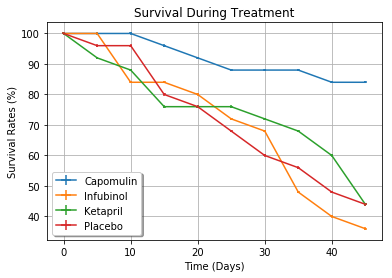

In [12]:
# Generate the Plot (Accounting for percentages)
Timepoint = (0,5,10,15,20,25,30,35,40,45)
Capomulin=count_of_mice_fmt.Capomulin
Infubinol=count_of_mice_fmt.Infubinol
Ketapril=count_of_mice_fmt.Ketapril
Placebo=count_of_mice_fmt.Placebo

survival_rate_fig = plt.figure()
plt.errorbar(Timepoint, Capomulin / 25 * 100, xerr=0.2, yerr=0.4)
plt.errorbar(Timepoint, Infubinol / 25 * 100, xerr=0.2, yerr=0.4)
plt.errorbar(Timepoint, Ketapril  / 25 * 100, xerr=0.2, yerr=0.4)
plt.errorbar(Timepoint, Placebo   / 25 * 100, xerr=0.2, yerr=0.4)
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rates (%)')
plt.title('Survival During Treatment')
plt.legend(loc='best', shadow=True)
plt.grid()

# Save the Figure
survival_rate_fig.savefig('Survival During Treatment.png')
# Show the Figure
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
percent_change_drug = mean_tumor_volume_fmt.pct_change()
#Replace the NAN values which come on the 1st row prior to executing the prior code above. 
percent_change_drug = percent_change_drug.fillna(0)
# Display the data to confirm
percent_change_drug

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,-0.016309,0.033401,0.045822,0.053093,0.039913,0.047235,0.049977,-0.023448,0.056166,0.041152
10,-0.026698,0.038322,0.049762,0.046278,0.040561,0.048758,0.039209,-0.032152,0.040743,0.039231
15,-0.023674,0.037463,0.038306,0.056829,0.045977,0.039180,0.040035,-0.024379,0.041759,0.042908
20,-0.032046,0.041182,0.037065,0.048110,0.053228,0.058503,0.044636,-0.030286,0.049253,0.047092
25,-0.019078,0.040850,0.047325,0.050219,0.057562,0.057357,0.040441,-0.031413,0.038817,0.042554
30,-0.029299,0.045717,0.046381,0.057482,0.049840,0.040473,0.048505,-0.006957,0.065175,0.041142
35,-0.024568,0.036252,0.041905,0.038974,0.052478,0.043665,0.037010,-0.032327,0.043692,0.041166
40,-0.022710,0.044883,0.039846,0.042557,0.046513,0.042167,0.044662,-0.023441,0.046695,0.047052


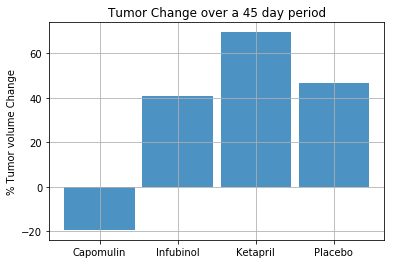

In [14]:
# Store all Relevant Percent Changes into a Tuple
subset = percent_change_drug[['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol','Placebo', 'Propriva', 'Ramicane',
                              'Stelasyn', 'Zoniferol']]
drug_tuples = [tuple(x) for x in subset.values]

# Splice the data between passing and failing drugs. For our excercise I have selected Capomulin, Infubinol, Ketapril, & Placebo.
splice = drug_tuples[9]
splice = splice[:6]
capomulin = splice[:1]
Infubinol = splice[2:3]
Ketapril = splice[3:4]
Placebo = splice[5:6]

#Combine all the tuples for each 4 drugs (listed above) into one tuple. 
selected_drugs = capomulin + Infubinol + Ketapril + Placebo
#Convert the tuple to a Dataframe. 
selected_drugs_pct = pd.DataFrame(list(selected_drugs))
df1_transposed =  selected_drugs_pct.transpose()

df1_transposed = df1_transposed.rename(index=str, columns={0: "Capomulin", 1: "Infubinol", 2: "Ketapril", 3: "Placebo"})
df1_transposed1 = df1_transposed.rename({0: "selected_drugs_pct"})

df1_transposed1['Capomulin'] = pd.Series(["{0:.2f}".format(val*1000) for val in df1_transposed1['Capomulin']], 
                                         index = df1_transposed1.index)
df1_transposed1['Infubinol'] = pd.Series(["{0:.2f}".format(val*1000) for val in df1_transposed1['Infubinol']], 
                                         index = df1_transposed1.index)
df1_transposed1['Ketapril'] = pd.Series(["{0:.2f}".format(val*1000) for val in df1_transposed1['Ketapril']], 
                                         index = df1_transposed1.index)
df1_transposed1['Placebo'] = pd.Series(["{0:.2f}".format(val*1000) for val in df1_transposed1['Placebo']], 
                                         index = df1_transposed1.index)
df1_transposed1 

# Orient widths. Add labels, tick marks, etc. 
Drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
y_pos = np.arange(len(Drugs))
performance = [-19.43, 41.05, 69.54, 46.60]
plt.bar(y_pos, performance, align='center', alpha=0.8, width = 0.9)
plt.xticks(y_pos, Drugs)
plt.ylabel('% Tumor volume Change')
plt.title('Tumor Change over a 45 day period')
plt.grid()

# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure
Drug_analysis_fig = plt.figure()
Drug_analysis_fig.savefig('Tumor Change over a 45 day period.png')
# Show the Figure
fig.show()